For those of you who are about to start an airbnb business in Melbourne and professional airbnb hosts,I will overview the Melbourne airbnb market, propose price setting suggestions by recognizing important features that affect price and their relationships based on data visualization and modeling of the dataset from the insightsairbnb website.Total 17,551 obeservations and 74 variables recorded Melbourne airbnb information from 2009 to present.



## Dataset overview

In [1]:
# prepare
import pandas as pd
import warnings
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10,10]
sns.set_theme(style = 'darkgrid')

In [2]:
# read dataset
df_melb = pd.read_csv('listings.csv.gz',compression='gzip')
df_melb.shape #(17551,74)
df_melb.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1273635,https://www.airbnb.com/rooms/1273635,20220606014126,2022-06-06,Private double room in Melbourne,A comfortable double bedroom with private bath...,Within 100 metres of our home is the Donburn s...,https://a0.muscache.com/pictures/f79ef227-3482...,6692322,https://www.airbnb.com/users/show/6692322,Barry,2013-06-02,"Melbourne, Victoria, Australia",I am from Melbourne Australia intending to vis...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/6692322/profi...,https://a0.muscache.com/im/users/6692322/profi...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Doncaster East, Victoria, Australia",Manningham,NaN,-37.78438,145.16477,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$106.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,29,59,89,179,2022-06-06,1,0,0,2019-06-18,2019-06-18,5.0,5.00,5.00,5.00,5.00,5.00,5.00,NaN,t,1,0,1,0,0.03
1,1273768,https://www.airbnb.com/rooms/1273768,20220606014126,2022-06-06,Fortnightly or Monthly Rental close to CBD,Compact apartment with all the necessities for...,Great cafes just a short stroll from the front...,https://a0.muscache.com/pictures/19203077/cfc3...,6933179,https://www.airbnb.com/users/show/6933179,Alex,2013-06-16,"Docklands, Victoria, Australia",Work at Icehouse Docklands Victoria\r\n,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6933179/profi...,https://a0.muscache.com/im/users/6933179/profi...,Collingwood/Fitzroy,1.0,1.0,"['email', 'phone']",t,t,"Fitzroy, Victoria, Australia",Yarra,NaN,-37.80759,144.97821,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$86.00,14,1125,14,14,1125,1125,14.0,1125.0,NaN,t,1,1,30,305,2022-06-06,47,6,0,2013-07-19,2022-03-06,4.6,4.87,4.67,4.93,4.83,4.93,4.72,NaN,f,1,1,0,0,0.43


In [3]:
df_list = pd.read_csv('listings.csv')
df_list.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,633258,Hip sun drenched Windsor apartment,440653,Rob,NaN,Stonnington,-37.85437,144.99488,Entire home/apt,74,2,17,2018-06-28,0.14,1,0,0,NaN
1,1273635,Private double room in Melbourne,6692322,Barry,NaN,Manningham,-37.78438,145.16477,Private room,106,1,1,2019-06-18,0.03,1,179,0,NaN


In [4]:
# dataset overview
df_melb.duplicated().sum() #0
#df_melb.info()

0

In [5]:
#Sort out the null value
df_list.isnull().sum().sort_values(ascending=False) 

license                           17551
neighbourhood_group               17551
reviews_per_month                  3638
last_review                        3638
host_name                             3
name                                  2
number_of_reviews                     0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

## Preprocess


In [6]:
#fill 3 null value by the first review date
df_melb.loc[df_melb['host_since'].isnull(),'host_since'] = df_melb.loc[df_melb['host_since'].isnull()]['first_review']

In [7]:
# Split year and month
df_melb['date'] = pd.to_datetime(df_melb['host_since'])
df_melb['year'],df_melb['month'] = df_melb['date'].apply(lambda x: int(x.year)),df_melb['date'].apply(lambda x: int(x.month))

In [8]:
# Convert price format from string with $ to float without $
df_melb[['price']] = df_melb[['price']].replace('[\$,]','',regex=True).astype(float)

In [9]:
# fill null value of bathrooms text
df_melb['bathrooms_text'].isnull().sum() # 20
df_melb['bathrooms_text'].fillna('1',inplace=True)
df_melb['bathrooms_text'].isnull().sum() #0

0

In [10]:
# fill null value of bedrooms
df_melb['bedrooms'].fillna('1',inplace=True)
df_melb['bedrooms'].isnull().sum()

0

In [11]:
# convert string to int 
df_melb['accommodates'] = df_melb['accommodates'].astype(int)

The quality of dataset looks good. Total 17,751 observations and 77 variables. But some features like host_neighbourhood has more than a half missing value, we will not consider them.  
Preprocession has been done,including,
1. Filled the only 1 missing value of host since date by first_review. 
2. Filled the 20 missing 'bathrooms_text'by 1.
3. Filled the 20 missing 'bedrooms' by 1.
4. Extracted the year and month value.
5. Extract digit value without '$' from price.
6. Convert string data type of 'accommodates' to integer.
7. No duplicated value.
8. Will do the cross field validation when analyzing data.

## Overview Melbourne Airbnb market

### Define functions

In [12]:
# Get count data and merge it with geomap data.
def get_Countmap(df,df_map):
    df_count = df['neighbourhood'].value_counts().reset_index()
    df_count = df_count.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
    df_count['counts'] = df_count['counts'].astype(int)
    count_region = df_map.merge(df_count,on = 'neighbourhood',how='left')
    return count_region

# Get price data and merge it with geomap data.
def get_Pricemap(df,df_map):
    df_price = df.groupby(['neighbourhood'])['price'].median().reset_index()
    price_region = df_map.merge(df_price,on='neighbourhood',how='left')
    return price_region

# Draw count heatmap
def draw_countmap(df,a,classification,color,titlename):
    df.plot(column = 'counts',ax=a,legend=True,cmap=color,scheme = 'Percentiles',classification_kwds={'pct':classification})
    a.set_title(titlename,fontsize=20) 
    
#Draw price heatmap
def draw_pricemap(df,a,classification,color,titlename):
    df.plot(column = 'price',ax=a,legend=True,cmap=color,scheme = 'Percentiles',classification_kwds={'pct':classification})
    a.set_title(titlename,fontsize=20)  

# get bath number
def get_bath_number(value):
    if value == 1:
        return 1
    elif 'Half-bath' in value:
        return 0.5
    elif 'half-bath' in value:
        return 0.5
    else:
        m = re.search('(\d+)', value)
        return m.group(0)

### Distribution by Regions

In [13]:
# Filter dataframe
df_region = df_list[['id','neighbourhood','room_type','price']]   
year = df_melb[['id','year']]
df_region = df_region.merge(year,on='id',how='left')
df_region.head(2)

,id,neighbourhood,room_type,price,year
0,633258,Stonnington,Entire home/apt,74,2011
1,1273635,Manningham,Private room,106,2013


In [14]:
df_region.describe()

,id,price,year
count,1.755100e+04,17551.000000,17551.000000
mean,6.516760e+16,211.886217,2016.088200
std,1.861660e+17,465.608702,2.492535
min,9.835000e+03,0.000000,2009.000000
25%,1.867477e+07,80.000000,2014.000000
50%,3.176048e+07,136.000000,2016.000000
75%,4.688197e+07,217.000000,2018.000000
max,6.424434e+17,15000.000000,2022.000000


In [15]:
df_region.describe(include='object')

,neighbourhood,room_type
count,17551,17551
unique,30,4
top,Melbourne,Entire home/apt
freq,5188,11996


In [16]:
# get melbourne geojson data
melb_map = geopandas.read_file('neighbourhoods.geojson')

In [17]:
#draw airbnb numbers and price in regions by function
countmap = get_Countmap(df_region,melb_map)
count_titlename= 'Regional Distribution of Airbnb Numbers'
pricemap = get_Pricemap(df_region,melb_map)
price_titlename = 'Regional Distribution of Airbnb Price'
classification = [1,25,50,75,100]
color='Reds'

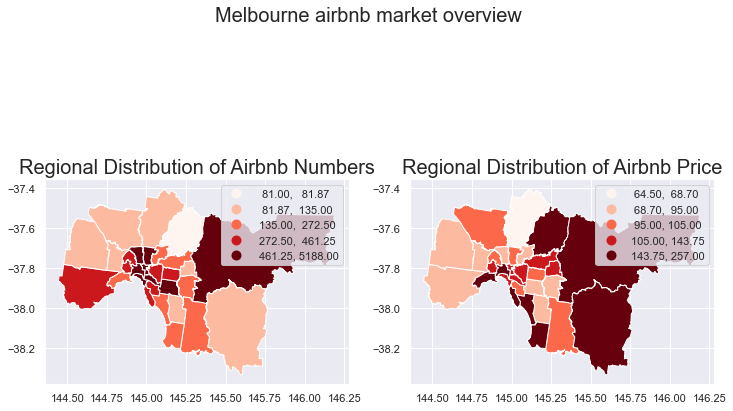

In [18]:
fig,axs = plt.subplots(1,2,figsize=(12,8))
fig.suptitle('Melbourne airbnb market overview',fontsize=20)
draw_countmap(countmap,axs[0],classification,color,count_titlename)
draw_pricemap(pricemap,axs[1],classification,color,price_titlename)

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

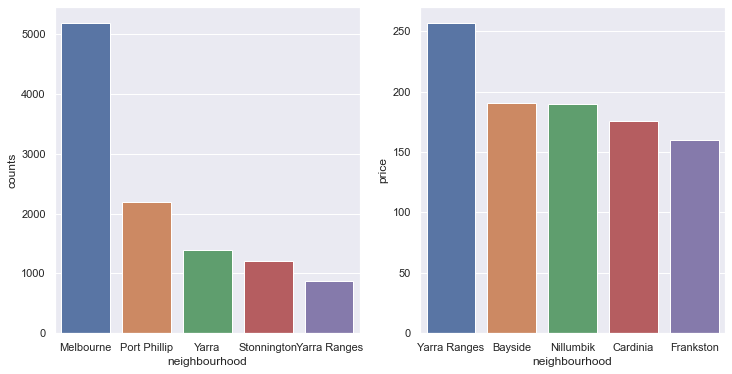

In [19]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
countbar = countmap.sort_values(by=['counts'],ascending=False)[:5]
pricebar = pricemap.sort_values(by=['price'],ascending=False)[:5]
sns.barplot(x='neighbourhood',y='counts',data=countbar,ax=axs[0])
sns.barplot(x='neighbourhood',y='price',data=pricebar,ax=axs[1])

Different council areas had the different airbnb numbers and median price. Most airbnbs located in the centre and east of Melbourne. Among them, the number of Airbnbs in the Melbourne City Council District was much higher than that of other City Council districts. In addition, airbnb prices in Melbourne's east were the highest. Airbnbs along the coast were also the most expensive.

In terms of specific council areas, the Yarra Ranges had the highest median airbnb prices, with Bayside a close second.

However, the airbnb located in the north of Melbourne was almost the least in terms of quantity and price.

### Distribution by Room type

In [20]:
df_room = df_melb[['id','room_type','price','bathrooms_text','bedrooms','accommodates','beds']]
roomtype_count = df_room['room_type'].value_counts()
roomtype_total = df_room['room_type'].count()

In [21]:
x = df_room['price'].to_numpy()
threshold_sigma = []
observations = []
percentage = []
sigma_range = [1,1.5,2,2.5,3]
for i in sigma_range:
    sigma_control = round(x.mean() + i * x.std(),2)
    threshold_sigma.append(sigma_control)
    roomtype_price = df_room[df_room['price']>sigma_control]
    numbers = roomtype_price['id'].count()
    observations.append(numbers)
    percentage_value = round((numbers)/17551,2)
    percentage.append(percentage_value)
    
range_dict = {'σ':sigma_range,'threshold_value':threshold_sigma,'above_numbers':observations,'percentage':percentage}
range_df = pd.DataFrame(range_dict)
range_df

,σ,threshold_value,above_numbers,percentage
0,1.0,677.48,569,0.03
1,1.5,910.28,334,0.02
2,2.0,1143.08,214,0.01
3,2.5,1375.87,165,0.01
4,3.0,1608.67,129,0.01


In [22]:
sigma_control = 910.28
roomtype_price = df_room[df_room['price']<sigma_control]

In [23]:
def make_autopct(value):
    def my_autopct(pct):
        total = sum(value)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, 'Airbnb price in different room type')

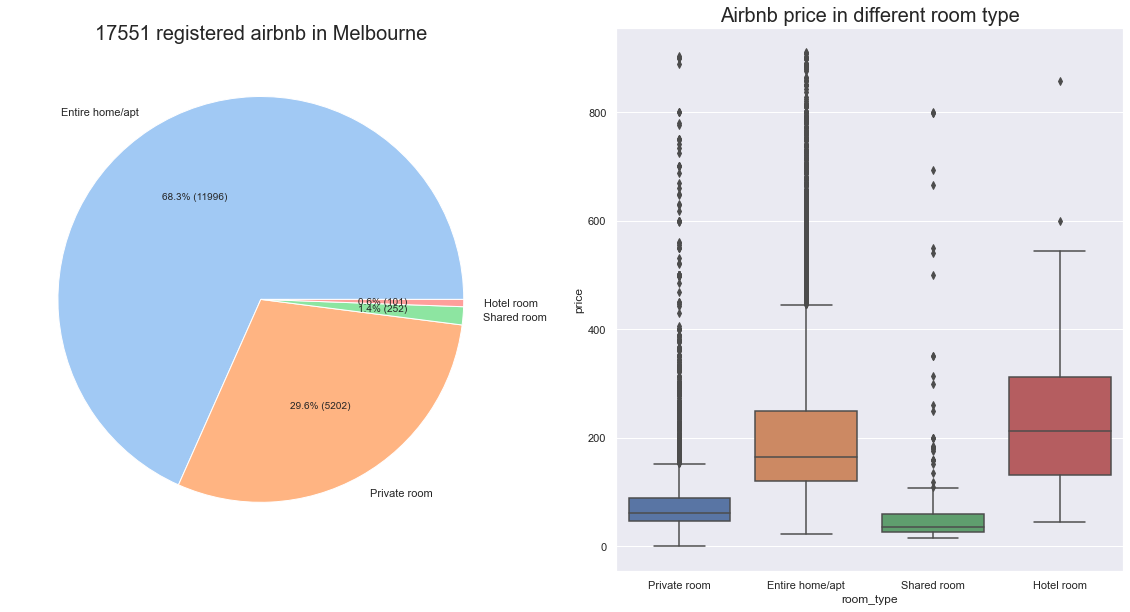

In [24]:
fig,axs = plt.subplots(1,2,figsize=(20,10))

colors = sns.color_palette('pastel')[0:4]
labels=['Entire home/apt','Private room','Shared room','Hotel room']
axs[0].pie(roomtype_count,labels = labels,colors=colors,autopct=make_autopct(roomtype_count))
axs[0].set_title('%d registered airbnb in Melbourne' %roomtype_total, fontsize=20)

sns.boxplot(x='room_type',y='price',data = roomtype_price, ax=axs[1])
axs[1].set_title('Airbnb price in different room type',fontsize=20)

The median price varies in terms of airbnb room types. Entire houses or apartments account for the most room types on Airbnb, followed by private rooms. Hotel rooms are minimal. But the median price of a hotel room is the most expensive. Shared rooms are the cheapest.

### Distribution by Registered time

In [25]:
df_dy = df_melb[['id','year','month','price','host_since','first_review','last_review']]
count_year = df_dy.groupby('year')['id'].count().reset_index()
price_year = df_dy.groupby('year')['price'].median().reset_index()
count_year = count_year.rename(columns={'id':'number'})

count_month = df_dy.groupby('month')['id'].count().reset_index()
price_month = df_dy.groupby('month')['price'].median().reset_index()
count_month = count_month.rename(columns={'id':'number'})

Text(0.5, 1.0, 'Airbnb Median price by Month')

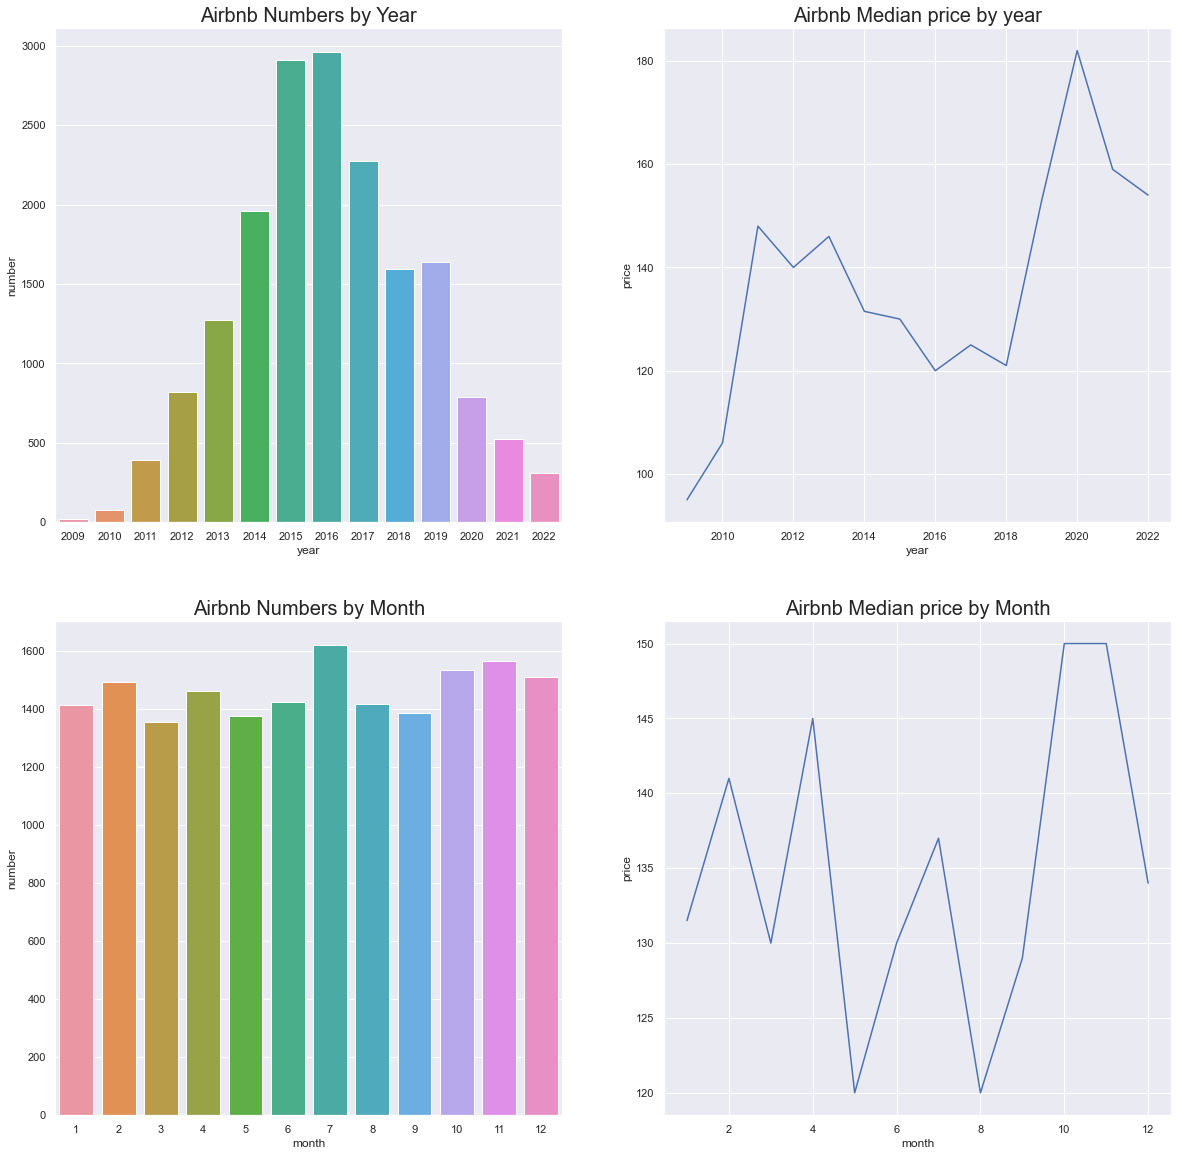

In [26]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
sns.barplot(x='year',y='number',data=count_year,ax=axs[0,0])
axs[0,0].set_title('Airbnb Numbers by Year',fontsize=20)
sns.lineplot(x='year',y='price',data=price_year,ax=axs[0,1])
axs[0,1].set_title('Airbnb Median price by year',fontsize=20)

sns.barplot(x='month',y='number',data=count_month,ax=axs[1,0])
axs[1,0].set_title('Airbnb Numbers by Month',fontsize=20)
sns.lineplot(x='month',y='price',data=price_month,ax=axs[1,1])
axs[1,1].set_title('Airbnb Median price by Month',fontsize=20)

If the number of airbnb was rising when registered, the price tended to fall. The number of Airbnbs increased substantially starting in 2011 and peaked in 2016. However, half pass 2022, the number of airbnbs has dropped to pre-2011 levels.

The median airbnb price in 2016 was the lowest from 2009 to the present. From 2011-2017 prices fell when the number of airbnbs rose, and prices rose when the number of airbnb registrations fell.

In addition, airbnb always has the most listings in July, and the median price fluctuates up and down seasonally.

### Distribution by Host

In [27]:
df_host = df_melb[['id','host_is_superhost','host_listings_count','year']]
df_host_sub = df_list[['id','host_id','neighbourhood','price']]
df_host = df_host.merge(df_host_sub,on='id',how='right')

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

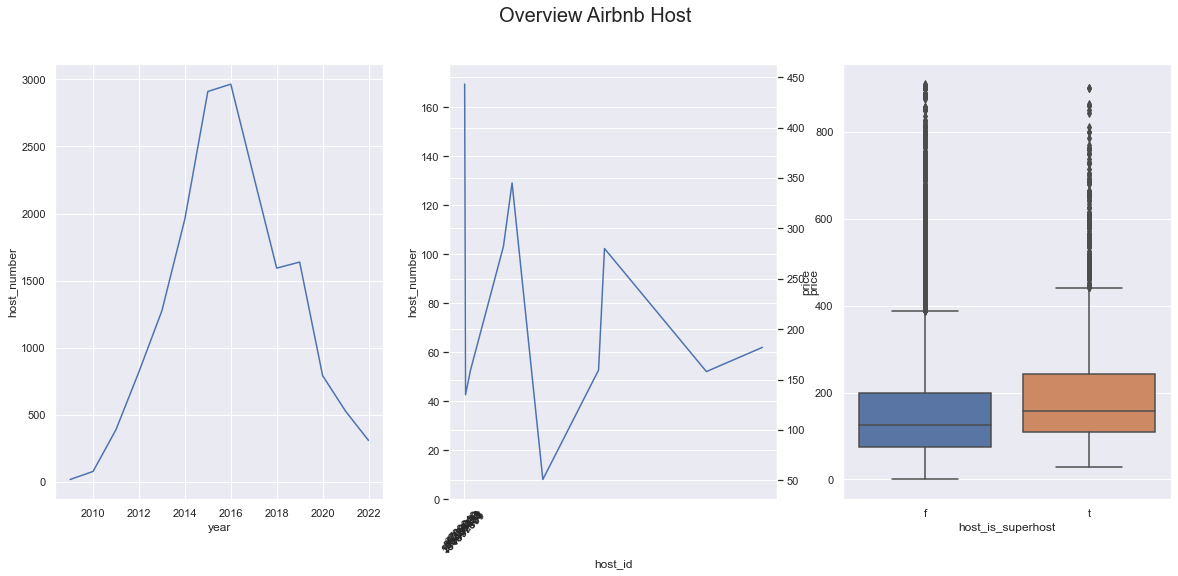

In [28]:
total = df_host['host_id'].count() # 17551
# 11209 total host
host_year = df_host.groupby(['year'])['host_id'].count().reset_index()
host_year = host_year.rename(columns={'host_id':'host_number'})
top_host = df_host['host_id'].value_counts().sort_values(ascending=False)[:10].reset_index()
top_host = top_host.rename(columns={'index':'host_id','host_id':'host_number'})
host_price = df_host.merge(top_host,on='host_id',how='right')
host_price = host_price.groupby(['host_id'])['price'].median().reset_index()
top_host = top_host.merge(host_price,on='host_id',how='left')

p = df_host['price'].to_numpy()
threshold = round(p.mean() + 1.5 * x.std(),2) # 1143.08
threshold_price = df_host[df_host['price']< threshold]

fig,axs = plt.subplots(1,3,figsize=(20,8))
fig.suptitle('Overview Airbnb Host',fontsize=20)
sns.lineplot(x='year',y='host_number',data=host_year,ax = axs[0])

sns.barplot(x='host_id',y='host_number',data=top_host,ax=axs[1])
axs[1].tick_params(axis='x',rotation=45)
axs2 = axs[1].twinx() #????????????
sns.lineplot(x='host_id',y='price',data=top_host,ax=axs2)

sns.boxplot(y='price',x='host_is_superhost',data=threshold_price,ax=axs[2])

????????????????????????????????????????????????

## Feature analysis

### Region

In [29]:
room_list = df_region['room_type'].unique().tolist()

(-38.4, -37.36)

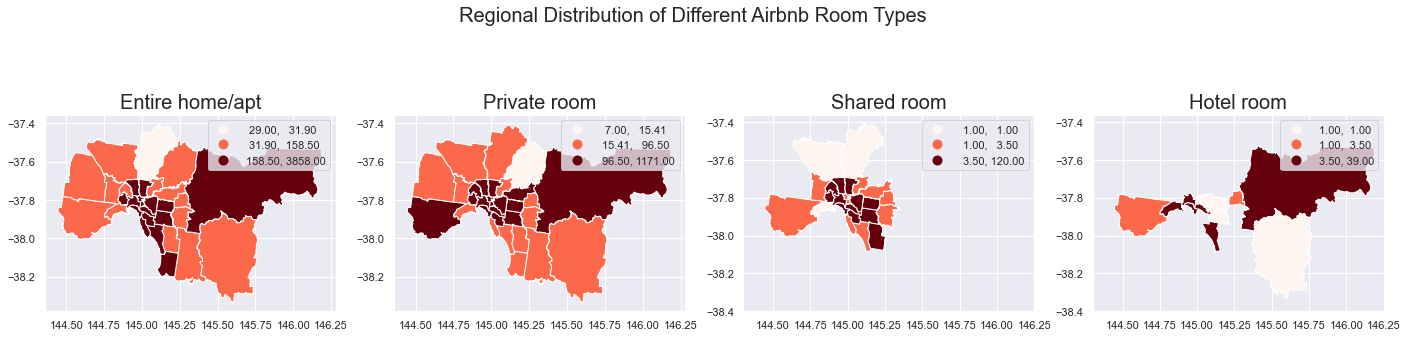

In [30]:
# Airbnb number distribution by regions.
title = []
roomtypelist = []
for roomtype in room_list:
    dataframe = df_region[df_region['room_type']==roomtype]
    roomtypelist.append(get_Countmap(dataframe,melb_map))
    title.append(roomtype)
    
classification = [1,50,100]
color = 'Reds'

fig,axs = plt.subplots(1,4,figsize=(24,6))
fig.suptitle('Regional Distribution of Different Airbnb Room Types',fontsize=20)
for index,df in enumerate(roomtypelist):
    draw_countmap(df,axs[index],classification,color,title[index])
axs[2].set_xlim(144.3,146.25)
axs[2].set_ylim(-38.4,-37.36)
axs[3].set_xlim(144.3,146.25)
axs[3].set_ylim(-38.4,-37.36)

From the previous pictures, we knew that the median price of a hotel room was the most expensive. And most hotel rooms were only available in Melbourne's north-east, which may be one reason median price of airbnb in this areas was higher than other places. Another reason was that the most entire aribnb rooms and private rooms were also located in northeast Melbourne.

Please note that most shared room were found in Melbourne's central south.

In [31]:
year_list = df_region['year'].unique().tolist()
year_list.sort()

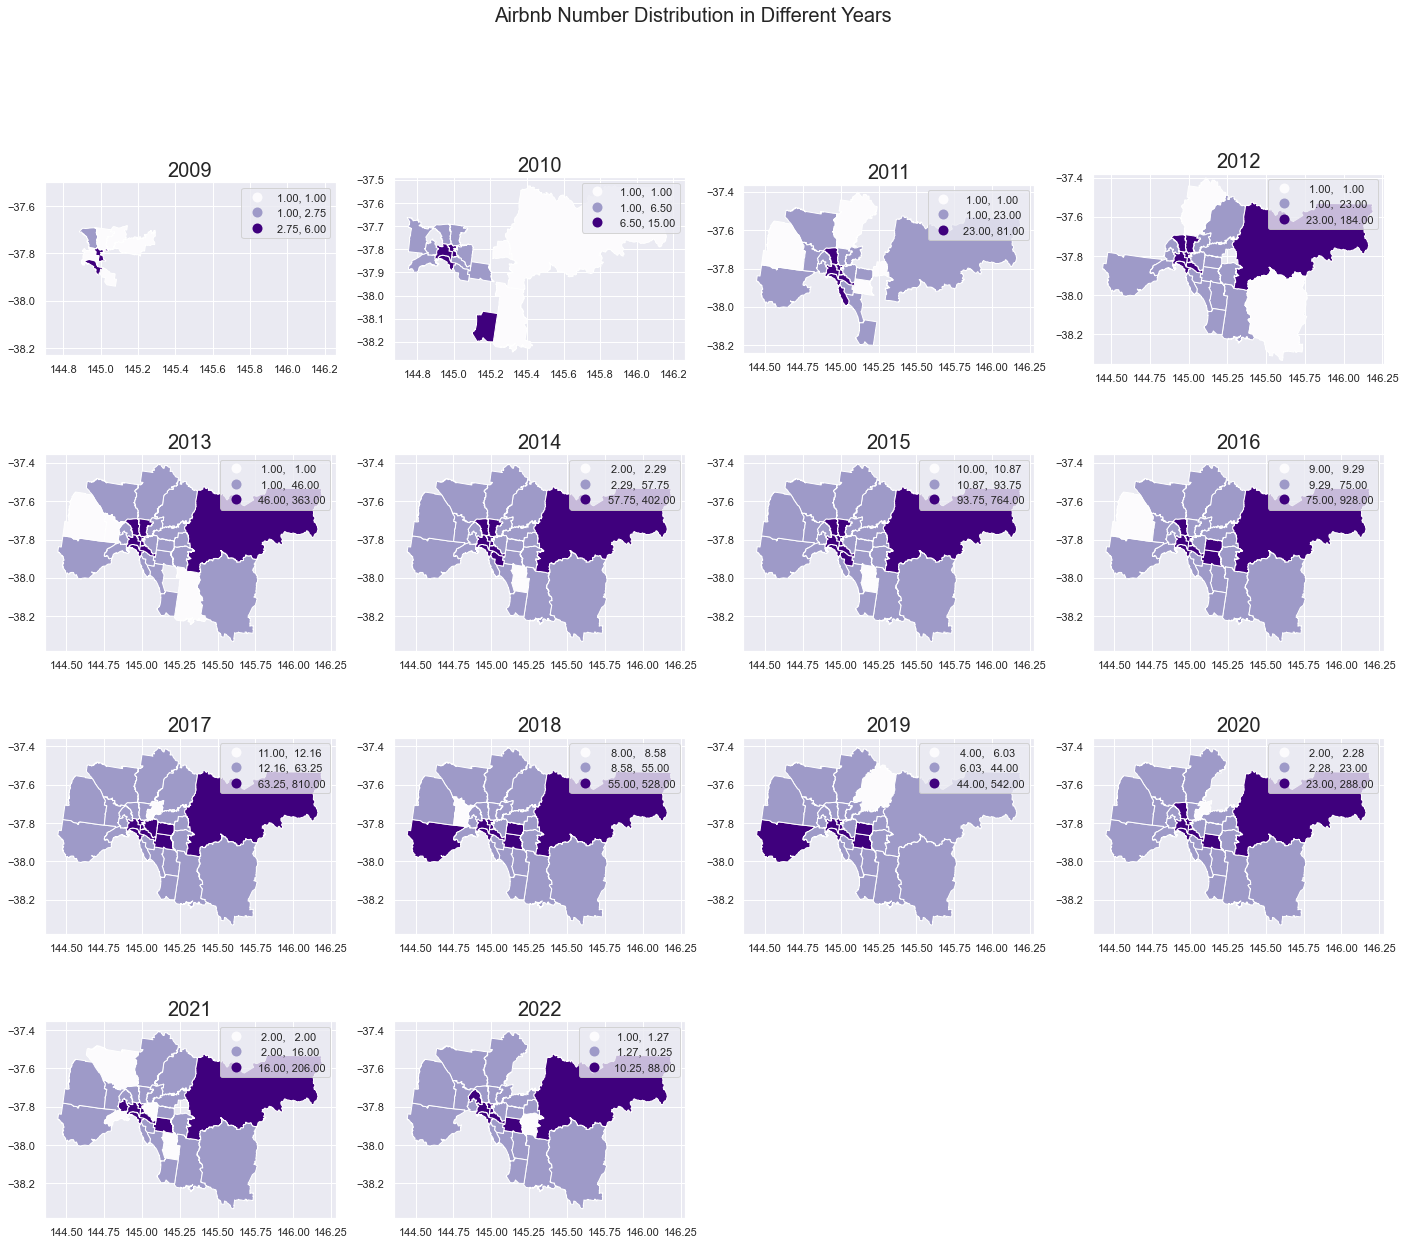

In [32]:
#Airbnb number distribution by year
title = []
dataframe_list = []
for year in year_list:
    dataframe_year = df_region[df_region['year']==year]
    dataframe_list.append(get_Countmap(dataframe_year,melb_map))
    title.append(year)
    
classification = [1,75,100]
color = 'Purples'

fig,axs = plt.subplots(4,4,figsize=(24,20))
fig.suptitle('Airbnb Number Distribution in Different Years',fontsize=20)
j = 0
for index,data in enumerate(dataframe_list):
    i = index % 4
    draw_countmap(data,axs[j,i],classification,color,title[index])
    if i == 3:
        j+=1
axs[0,0].set_xlim(144.7, 146.26)
axs[0,0].set_ylim(-38.23, -37.5)
axs[0,3].set_xlim(144.38, 146.26)
axs[0,3].set_ylim(-38.35, -37.38)
axs[3,2].set_axis_off()
axs[3,3].set_axis_off()

In 2009, airbnbs began to appear in the city center and southern coastal areas. A year later, more than ten airbnbs appeared in the eastern and southern coastal areas. Since 2013, they have developed to all melbourne, with the most in the eastern area for nearly 10 years except 2019. Nillumbik data was missing in 2019. Starting in 2019, northern regions such as Banyule have airbnb for one year and no airbnb for the next year

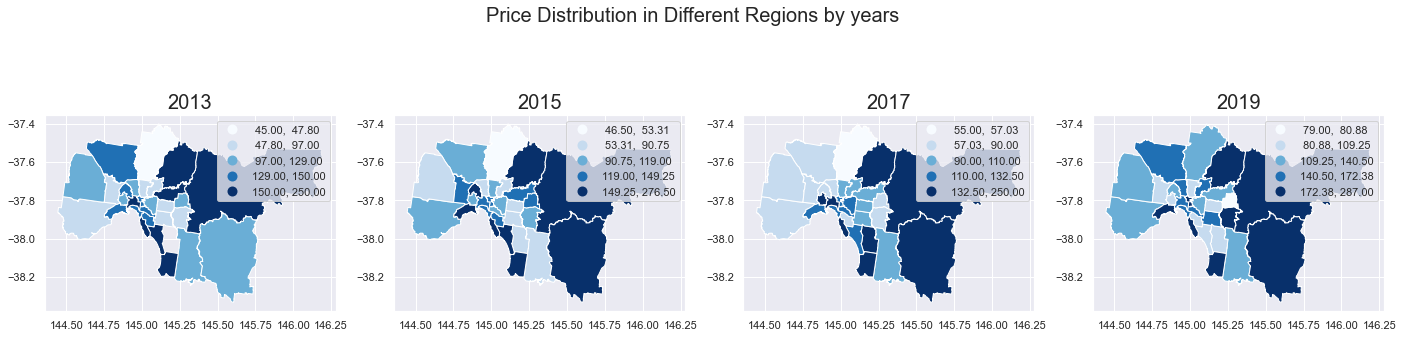

In [33]:
# Private and Entire home/apartment price distribution in regions by year.
title = []
ylist = [2013,2015,2017,2019]
roomtypelist = []
df_r = df_region[(df_region['room_type']=='Entire home/apt')|(df_region['room_type']=='Private room')]

for year in ylist:
    dataframe = df_r[df_r['year']==year]
    roomtypelist.append(get_Pricemap(dataframe,melb_map))
    title.append(year)
    
classification = [1,25,50,75,100]
color = 'Blues'

fig,axs = plt.subplots(1,4,figsize=(24,6))
fig.suptitle('Price Distribution in Different Regions by years',fontsize=20)
for index,df in enumerate(roomtypelist):
    draw_pricemap(df,axs[index],classification,color,title[index])

Since Airbnb has been available in every council area since 2011, I've selected data from 2013, 2015, 2017 and 2019 to see how prices were distributed within the area. Median airbnb prices in the east were consistently higher than others but the southern coast and remained unchanged from 2013 to 2019. Obviously, region wa related with price.


### Room details

In [34]:
# Filter data
neighbourhood = df_region[['id','neighbourhood','year']]
df_room = df_room.merge(neighbourhood,on='id',how='left')

In [35]:
# Convert string text of bathroom_text to int 
df_room['bath'] = df_room['bathrooms_text'].apply(lambda x:get_bath_number(x))   
df_room['bath'] = df_room['bath'].astype(int)
# Divided in 2 groups, 'only 1' and 'more than 1'
df_room['bath_type'] = df_room['bath'].apply(lambda x: 'Only 1' if x<2 else 'More than 1')

In [36]:
df_room['bedrooms'] = df_room['bedrooms'].astype(int)
# Filter the bathroom text containing 'share', marked  'shared bathroom' in the new column. 
df_room['shared_bath'] = df_room['bathrooms_text'].apply(lambda x: 'Shared bathroom'if 'share' in x else 'Private bathroom')
# Marked all airbnb with shared room type as shared bathroom.
df_room.loc[df_room[df_room['bedrooms']<df_room['bath']].index.tolist(),'shared_bath'] = 'Shared bathroom'

In [37]:
# get the list of regions who have top 4 records
region_list = df_room['neighbourhood'].value_counts().sort_values(ascending=False)[:4].index.tolist()

# filter data of 4 regions (['Melbourne', 'Port Phillip', 'Yarra', 'Stonnington'])
regiondf_list=[]
for councilarea in region_list:
    regiondf_list.append(df_room[df_room['neighbourhood']==councilarea])
df_region_test = pd.concat(regiondf_list)

In [38]:
# Filter room type as entire/apt and year 2019 and price below 1143.08
filt = (df_region_test['room_type']=='Entire home/apt') & (df_region_test['price']<sigma_control) & (df_region_test['year'] == 2019)
df_test = df_region_test[filt]
df_mp = df_test.groupby(['neighbourhood','bath_type'])['price'].median().reset_index()
df_mp
df_mp = df_mp.rename(columns={'price':'median_price'})
df_rp = df_test.merge(df_mp,on=['neighbourhood','bath_type'],how='left')

[Text(0.5, 1.0, 'Airbnb median price of different bath type in regions')]

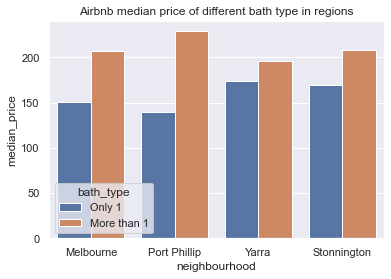

In [39]:
sns.barplot(x='neighbourhood',y='median_price',hue='bath_type',data=df_rp).set(title='Airbnb median price of different bath type in regions')

#### Shared bath or not

In [40]:
filt = (df_region_test['room_type']=='Entire home/apt') | (df_region_test['room_type']=='Private room') 
df_test = df_region_test[filt]
filt2 = (df_test['price']<sigma_control) & (df_test['year'] == 2019)
df_test = df_test[filt2]

df_bp = df_test.groupby(['neighbourhood','shared_bath'])['price'].median().reset_index()
df_bp = df_bp.rename(columns={'price':'median_price'})

df_sp = df_test.merge(df_bp,on=['neighbourhood','shared_bath'],how='left')

[Text(0.5, 1.0, 'Airbnb median price of shared bath or not in regions')]

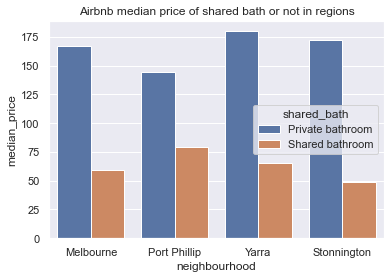

In [41]:

sns.barplot(x='neighbourhood',y='median_price',hue='shared_bath',data=df_sp).set(title='Airbnb median price of shared bath or not in regions')

I was trying to figure out why different room types have different prices. There were many features related to room detais, I chose bathroom number and type to analyze. Because the median price on airbnb varies from year to year, I fixed one year first. Besides, Hotel rooms and shared rooms were located in specific areas of Melbourne, which means that the whole home/apartment was a better choice to study regional distribution. At last, I only kept data for the top 4 recorded areas.

Finally, We can see that in these areas, rooms with more than 1 bathroom are more expensive than rooms with only 1 bathroom. A room with a private bathroom was more expensive than a room with a shared bathroom.

75% of the entire house/apartment had more than 1 bathroom, and the entire house/apartment or hotel room offered a private bathroom rather than a shared bathroom, resulting in their higher median prices than private and shared rooms. So, the room type does affect the price.

#### Distribution by time

In [42]:
council_count_list = []
council_price_list = []
for councilarea in region_list:
    df_council = df_room[df_room['neighbourhood']==councilarea]
    council_count = df_council.groupby(['year'])['id'].count().reset_index()
    council_count = council_count.rename(columns={'id':'counts'})
    council_count_list.append(council_count)
    council_price_list.append(df_council.groupby('year')['price'].median().reset_index())    

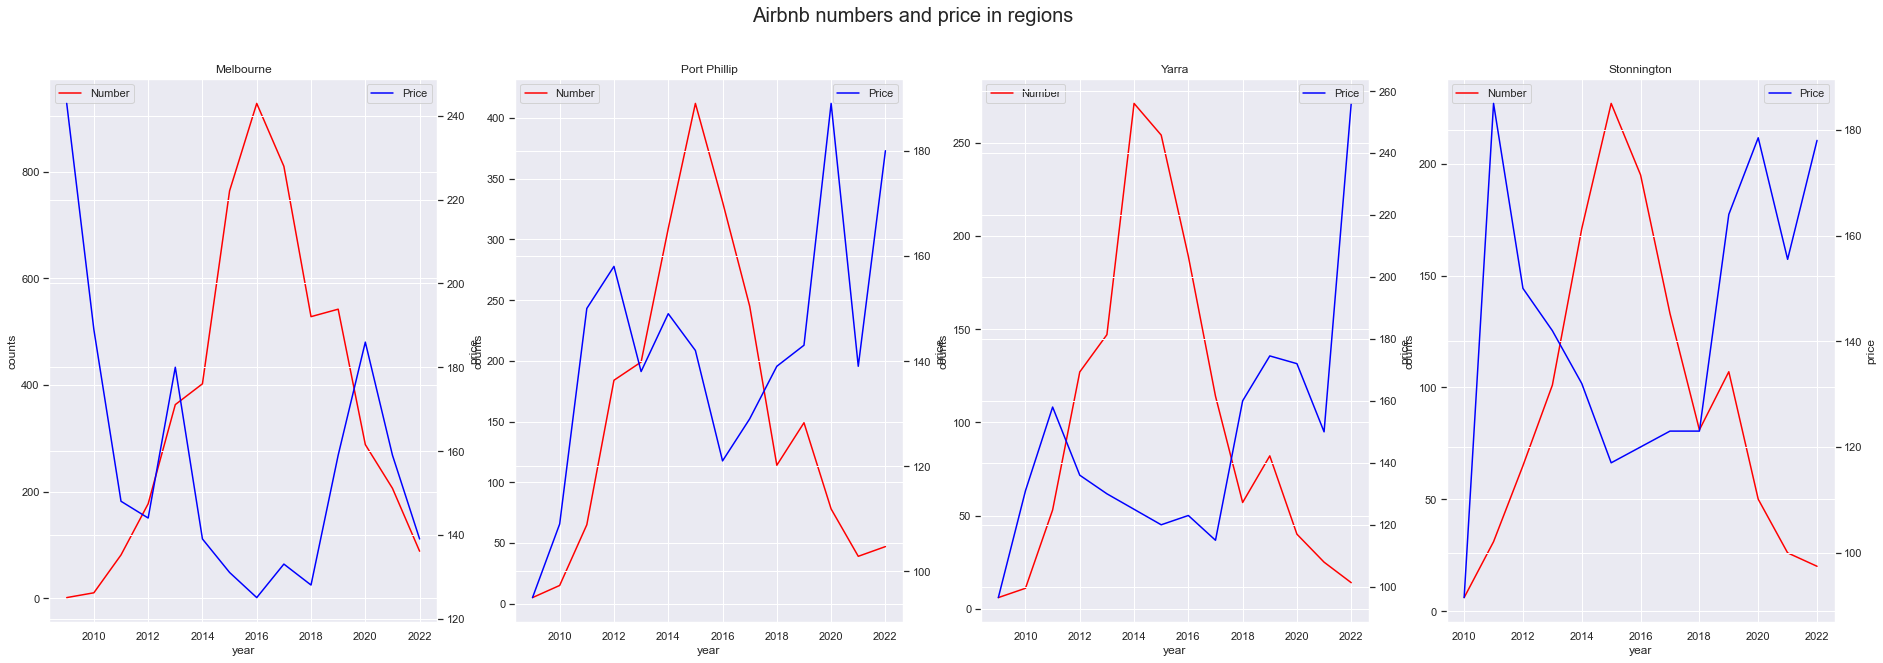

In [43]:
fig,axs = plt.subplots(1,4,figsize=(32,10))
fig.suptitle('Airbnb numbers and price in regions',fontsize=20)

for i,councilname in enumerate(region_list):
    sns.lineplot(x='year',y='counts',data=council_count_list[i],ax=axs[i],color='red',label='Number').legend(loc='upper left',frameon=True)
    axs[i].set(title=councilname)
    sns.lineplot(x='year',y='price',data=council_price_list[i],ax=axs[i].twinx(),color='blue',label='Price').legend(loc='upper right',frameon=True)
    

We continue to look at these areas and find that as the number of airbnbs increases, the price decreases.

In [44]:
df_dy.info() # 13913 missing value in last review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17551 entries, 0 to 17550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            17551 non-null  int64  
 1   year          17551 non-null  int64  
 2   month         17551 non-null  int64  
 3   price         17551 non-null  float64
 4   host_since    17551 non-null  object 
 5   first_review  13913 non-null  object 
 6   last_review   13913 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 959.9+ KB


In [45]:
tophost = df_host['host_id'].value_counts()[:56].reset_index() # total 11209 host, filter top 5%, at least has 35 listings.
tophost = tophost.rename(columns = {'index':'host_id',"host_id":'numbers'}) 

[Text(0.5, 1.0, 'Business running duration of all hosts')]

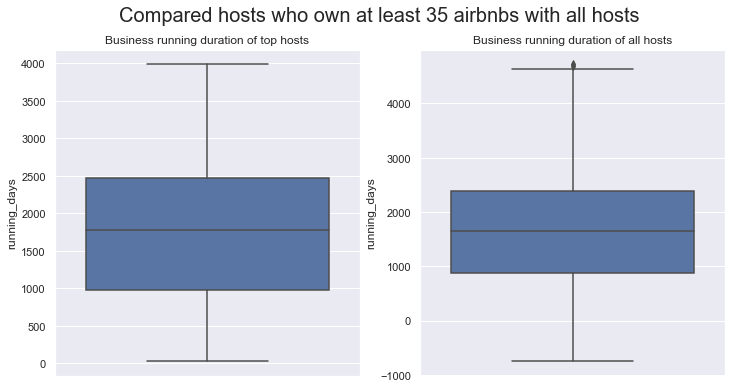

In [49]:
whole = df_melb[(df_melb['last_review'].notnull())&(df_melb['price']<sigma_control)]

whole['running_days'] = pd.to_datetime(whole['last_review'])-pd.to_datetime(whole['host_since'])
whole['running_days'] = whole['running_days'].map(lambda x: x/np.timedelta64(1,'D'))
tophost_df = whole.merge(tophost,on='host_id',how='right')

fig,ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Compared hosts who own at least 35 airbnbs with all hosts',fontsize=20)
sns.boxplot(y='running_days',data=tophost_df,ax=ax[0]).set(title='Business running duration of top hosts')
sns.boxplot(y='running_days',data=whole,ax=ax[1]).set(title='Business running duration of all hosts')

[Text(0.5, 1.0, 'availability of 365 days of all hosts')]

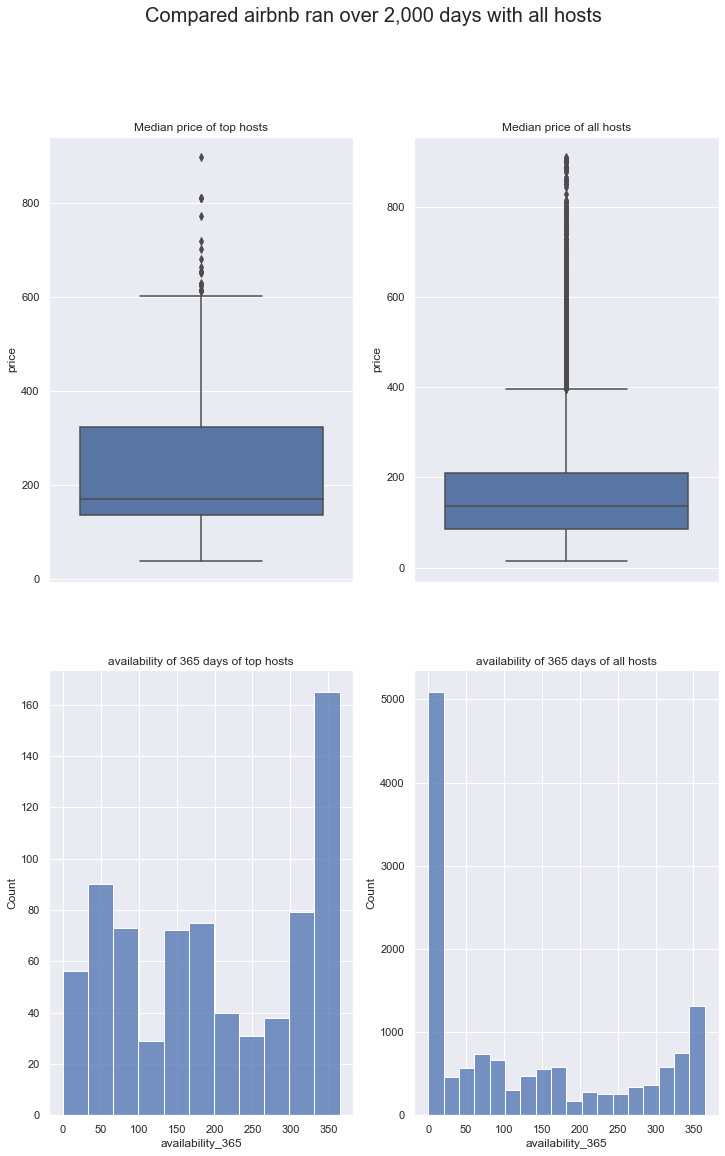

In [63]:
over2khost = tophost_df[tophost_df['running_days']>2000]

good_review = over2khost[over2khost['review_scores_rating']>=3]
good_review_whole = whole[whole['review_scores_rating']>=3]

fig,axs = plt.subplots(2,2,figsize=(12,18))
fig.suptitle('Compared airbnb ran over 2,000 days with all hosts',fontsize=20)
sns.boxplot(y='price',data=over2khost,ax=axs[0,0]).set(title='Median price of top hosts')
sns.boxplot(y='price',data=whole,ax=axs[0,1]).set(title='Median price of all hosts')

sns.histplot(x='availability_365',data=over2khost,ax=axs[1,0]).set(title='availability of 365 days of top hosts')
sns.histplot(x='availability_365',data=whole,ax=axs[1,1]).set(title='availability of 365 days of all hosts')


In [ ]:
tophost_active[tophost_active['running_days']<0]